In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # train_data processing, CSV file I/O (e.g. pd.read_csv)

# Input train_data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel(r"C:\Users\dsuryamath\DHANYA\ML_PRACTICE_PROJECTS\House_Price_Prediction_Random_Forest\data\raw\HousePricePrediction.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dsuryamath\\DHANYA\\ML_PRACTICE_PROJECTS\\House_Price_Prediction_Random_Forest\\data\\raw\\HousePricePrediction.xlsx'

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [ ]:
data.shape

(2919, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
def train_datatypes(data):
    obj = data.dtypes == "object"
    ints = data.dtypes == "int64"
    floats = data.dtypes == "float64"

    print("Object columns:", data.columns[obj].tolist(),':',len(data.columns[obj].tolist()),"\n")
    print("Integer columns:", data.columns[ints].tolist(),':',len(data.columns[ints].tolist()),"\n")
    print("Float columns:", data.columns[floats].tolist(),':',len(data.columns[floats].tolist()),"\n")

train_datatypes(train_data)

Object columns: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'] : 4 

Integer columns: ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd'] : 6 

Float columns: ['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'] : 3 



In [ ]:
data.describe()


In [ ]:
data.isnull().sum()

In [ ]:
data.head()

In [ ]:
def get_uniques(df, columns):
   
    uniques = {}
    for col in columns:
        if col in df.columns:
            uniques[col] = df[col].dropna().unique().tolist()
        else:
            uniques[col] = None  # Or []/warning depending on your preference
    return uniques

col = ['MSSubClass','MSZoning','LotConfig','BldgType',
       'OverallCond','Exterior1st']
#'LotArea','YearBuilt','YearRemodAdd', 'BsmtFinSF2','TotalBsmtSF'

uniques = get_uniques(data, col)
for k, v in uniques.items():
    print(f"{k}: {v}\n")

MSSubClass: [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40, 150]

MSZoning: ['RL', 'RM', 'C (all)', 'FV', 'RH']

LotConfig: ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']

BldgType: ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']

OverallCond: [5, 8, 6, 7, 4, 2, 3, 9, 1]

Exterior1st: ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock']



In [ ]:
train_data = data.iloc[0:1460,:]
test_data = data.iloc[1460:,:12]

In [ ]:
train_data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


In [ ]:
test_data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
1460,1460,20,RH,11622,Inside,1Fam,6,1961,1961,VinylSd,144.0,882.0
1461,1461,20,RL,14267,Corner,1Fam,6,1958,1958,Wd Sdng,0.0,1329.0
1462,1462,60,RL,13830,Inside,1Fam,5,1997,1998,VinylSd,0.0,928.0
1463,1463,60,RL,9978,Inside,1Fam,6,1998,1998,VinylSd,0.0,926.0
1464,1464,120,RL,5005,Inside,TwnhsE,5,1992,1992,HdBoard,0.0,1280.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0


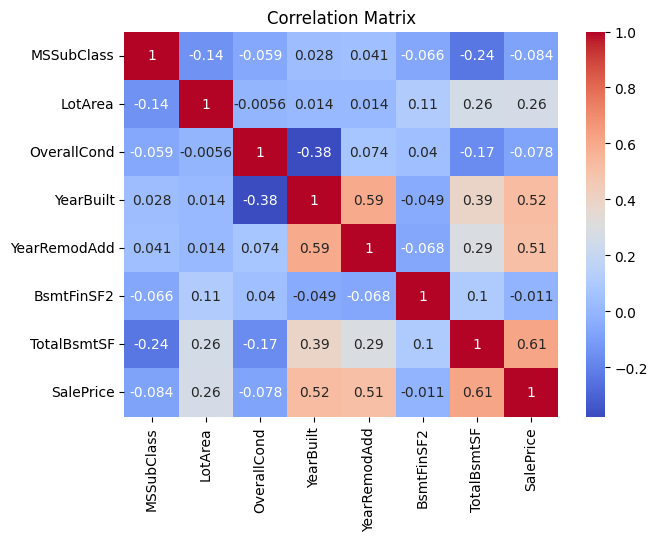

In [ ]:
num_cols = ['MSSubClass','LotArea','OverallCond','YearBuilt',
            'YearRemodAdd','BsmtFinSF2','TotalBsmtSF']


# Heatmap of correlations
plt.figure(figsize=(7,5))
sns.heatmap(train_data[num_cols + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


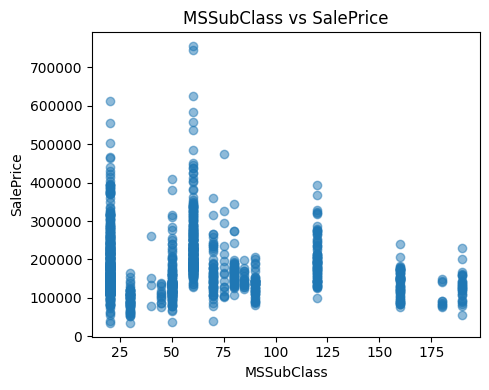

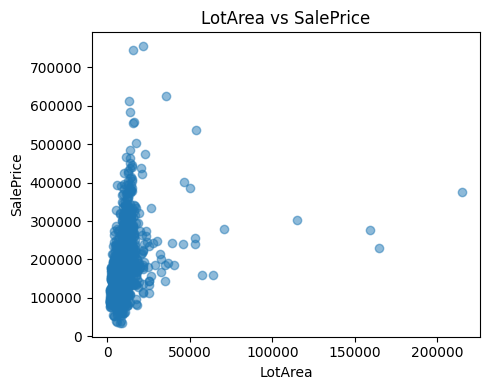

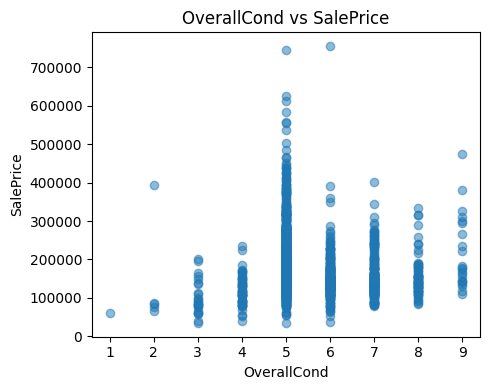

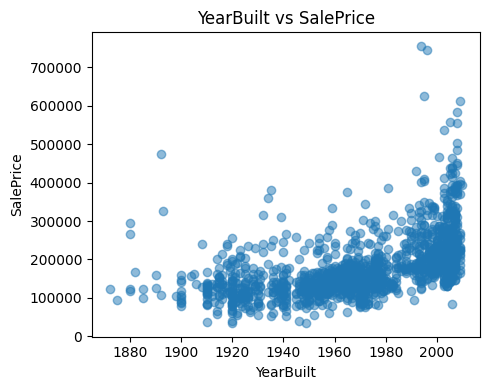

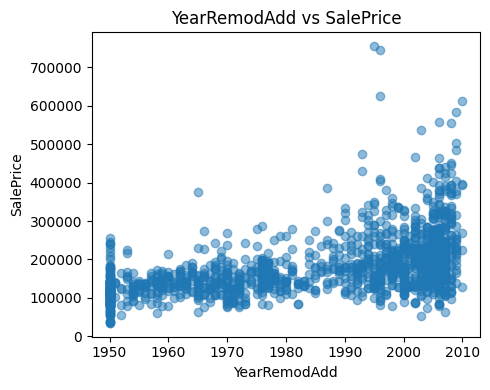

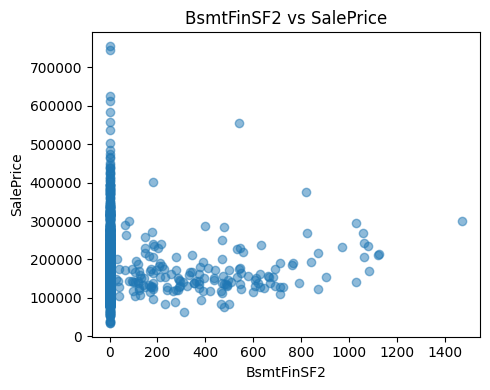

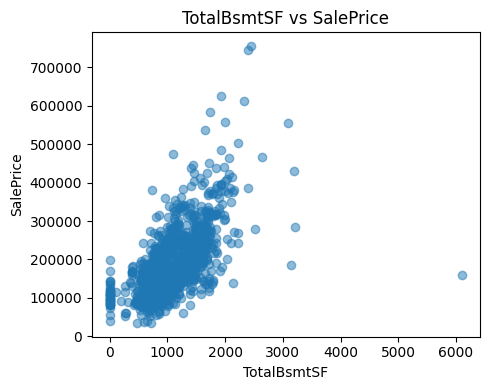

In [ ]:
# Scatter plots for each numeric column vs SalePrice
for col in num_cols:
    plt.figure(figsize=(5,4))
    plt.scatter(train_data[col], train_data['SalePrice'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(f'{col} vs SalePrice')
    plt.tight_layout()
    plt.show()

In [ ]:
cat_cols = ['MSSubClass', 'OverallCond']

for col in cat_cols:
    # 3.1 Value counts
    print(f"\n-- {col} value counts:")
    print(train_data[col].value_counts())

    # 3.2 Boxplot of SalePrice by category
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y='SalePrice', train_data=train_data)
    plt.title(f'SalePrice by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


-- MSSubClass value counts:
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64


ValueError: Could not interpret value `MSSubClass` for `x`. Value is a string, but `data` was not passed.

<Figure size 600x400 with 0 Axes>

In [ ]:
train_data.head()

In [ ]:
train_data.isnull().sum()


In [ ]:
train_data['Exterior1st']=train_data['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0])
train_data['MSZoning']=train_data['MSZoning'].fillna(train_data['MSZoning'].mode()[0])


C:\Users\dsuryamath\AppData\Local\Temp\ipykernel_29640\2623607286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Exterior1st']=train_data['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0])
C:\Users\dsuryamath\AppData\Local\Temp\ipykernel_29640\2623607286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['MSZoning']=train_data['MSZoning'].fillna(train_data['MSZoning'].mode()[0])


In [ ]:

train_data['BsmtFinSF2']=train_data['BsmtFinSF2'].fillna(train_data['BsmtFinSF2'].mean())
train_data['TotalBsmtSF']=train_data['TotalBsmtSF'].fillna(train_data['TotalBsmtSF'].mean())

C:\Users\dsuryamath\AppData\Local\Temp\ipykernel_29640\3013580031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['BsmtFinSF2']=train_data['BsmtFinSF2'].fillna(train_data['BsmtFinSF2'].mean())
C:\Users\dsuryamath\AppData\Local\Temp\ipykernel_29640\3013580031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['TotalBsmtSF']=train_data['TotalBsmtSF'].fillna(train_data['TotalBsmtSF'].mean())


In [ ]:
train_data.isnull().sum()


Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [ ]:
train_data= train_data.drop(columns=['Id'])


In [ ]:

#Object columns: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
encoding =['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in encoding:
    train_data[col] = le.fit_transform(train_data[col])

In [ ]:
train_data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,4,0,5,1999,2000,12,0.0,953.0,175000.0
1456,20,3,13175,4,0,6,1978,1988,9,163.0,1542.0,210000.0
1457,70,3,9042,4,0,9,1941,2006,5,0.0,1152.0,266500.0
1458,20,3,9717,4,0,6,1950,1996,8,1029.0,1078.0,142125.0


In [ ]:
train_data=train_data.drop(['Id'],axis=1)


KeyError: "['Id'] not found in axis"

In [ ]:
X= train_data.drop(columns=['SalePrice'])
Y= train_data['SalePrice']

In [ ]:
Y

In [ ]:
X

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,4,0,5,1999,2000,12,0.0,953.0
1456,20,3,13175,4,0,6,1978,1988,9,163.0,1542.0
1457,70,3,9042,4,0,9,1941,2006,5,0.0,1152.0
1458,20,3,9717,4,0,6,1950,1996,8,1029.0,1078.0


In [ ]:
from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, Y_TRAIN,Y_TEST = train_test_split(
    X,Y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression

ln = LinearRegression()
ln.fit(X_TRAIN, Y_TRAIN)

y_pred_LR = ln.predict(X_TEST)

In [ ]:
from sklearn.metrics import r2_score

r2_scoreln = r2_score(Y_TEST,y_pred)
print(r2_scoreln)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_TRAIN, Y_TRAIN)
Y_pred_RF = model_RFR.predict(X_TEST)

print(mean_absolute_percentage_error(Y_TEST,Y_pred_RF))
r2_scoreRF = r2_score(Y_TEST,Y_pred_RF)
print(r2_scoreRF)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_TRAIN, Y_TRAIN)
Y_pred_SVM = model_SVR.predict(X_TEST)

print(mean_absolute_percentage_error(Y_TEST, Y_pred_SVM))
print(r2_score(Y_TEST,Y_pred_SVM))


In [ ]:
#PREDICTION

predict_house_price = pd.DataFrame([['60','3','8450','4','0','5','2003','2003','12','0.0','856.0']],
                                  columns=['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF'])

In [ ]:
''''from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
pred_new_testing =sc.fit_transform(predict_house_price)
''''


In [ ]:
model_RFR.predict(pred_new_testing)

In [ ]:


X_train=train_data.drop(['SalePrice'],axis=1)

Y_train=train_data['SalePrice']

In [ ]:
Y_train

In [ ]:
Y_train = np.array(train_data['SalePrice']).reshape(-1,1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
Y_train = sc.fit_transform(Y_train)

In [ ]:
Y_train 


In [ ]:
test_data

In [ ]:

#Object columns: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
encoding =['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in encoding:
    test_data[col] = le.fit_transform(test_data[col])

In [ ]:
test_data.isnull().sum()

In [ ]:
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mean())
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())

In [ ]:
test_data.isnull().sum()

In [ ]:
X_test =test_data.copy()

In [ ]:
X_test=test_data.drop(['Id'],axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(X_test)

In [ ]:
X_test

In [ ]:
from sklearn.linear_model import LinearRegression

ln = LinearRegression()
ln.fit(X_train, Y_train)

y_pred = ln.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred.shape

In [ ]:
y_pred_original = sc.inverse_transform(y_pred)


In [ ]:
new_BsmtFinSF2=train_data['BsmtFinSF2']

In [ ]:
sns.displot(train_data['BsmtFinSF2'])

In [ ]:
#to see outlier
sns.boxplot(train_data['BsmtFinSF2'])

In [ ]:
outlier=[]

def detect_outlier(train_dataset):

    threshold=5
    mean=np.mean(train_dataset)
    std=np.std(train_dataset)


    for i in train_dataset:
        z_score = (i-mean)/std

        if np.abs(z_score)> threshold:
            outlier.append(i)
    return outlier



In [ ]:
outlier_output=detect_outlier(new_BsmtFinSF2)

In [ ]:
outlier_output

In [ ]:
import pandas as pd

def detect_outliers_iqr(train_data, column):
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Select rows where the column value is an outlier
    outliers = train_data[(train_data[column] < lower_bound) | (train_data[column] > upper_bound)]
    
    print(f"Number of outliers in '{column}': {outliers.shape[0]}")
    print(f"Outlier values in '{column}':\n", outliers[[column]])
    
    return outliers

# Example usage:
train_data = pd.read_excel('/kaggle/input/train_dataset/HousePricePrediction.xlsx')

# Detect and display outliers in SalePrice
outliers_saleprice = detect_outliers_iqr(train_data, 'SalePrice')

# Detect and display outliers in LotArea
outliers_lotarea = detect_outliers_iqr(train_data, 'LotArea')

# Detect and display outliers in TotalBsmtSF
outliers_bsmt = detect_outliers_iqr(train_data, 'TotalBsmtSF')
